In [103]:
# import required modules

import matplotlib.pyplot as plt
import numpy as np
import pprint, os

# to get "physion" see: https://github.com/yzerlaut/physion
from physion.analysis.read_NWB import Data
from physion.dataviz.show_data import MultimodalData
from physion.assembling.saving import get_files_with_extension

# to get "datavyz" see: https://github.com/yzerlaut/datavyz
from datavyz import graph_env_manuscript as ge

# Dataset description

In [165]:
# ALL RECORDINGS IN THAT BATCH OF EXPERIMENTS
FILES = get_files_with_extension('/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021', 
                                 '.nwb', recursive=True)
FILES = np.sort(FILES) # sort by date

In [168]:
# RESTRICTED TO THOSE WITH ALL MODALITIES AND SPANNING THE WHOLE PROTOCOL
FILES = ['/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_12/2021_10_12-15-34-26.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_12/2021_10_12-16-44-18.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_14/2021_10_14-15-34-45.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-13-12-35.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-16-42-16.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-17-51-55.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-16-05-01.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_14/2021_10_14-16-54-21.nwb', # PB HERE
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-14-30-52.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-16-22-39.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_22/2021_10_22-17-28-02.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_22/2021_10_22-16-10-05.nwb']

In [166]:
for i, f in enumerate(FILES):
    data = MultimodalData(FILES[i])
    print('session #%i' % (i+1), ' --> %s (%s)' % (f.split(os.path.sep)[-1], data.metadata['subject_ID']))
    data.io.close()

session #1  --> 2021_09_30-14-54-00.nwb (Mouse3_SSTCre)
session #2  --> 2021_09_30-15-29-40.nwb (Mouse3_SSTCre)
session #3  --> 2021_09_30-16-07-49.nwb (Mouse3_SSTCre)
session #4  --> 2021_09_30-16-46-05.nwb (Mouse4_SSTCre)
session #5  --> 2021_09_30-17-22-09.nwb (Mouse4_SSTCre)
session #6  --> 2021_10_01-10-04-59.nwb (Mouse3_SSTCre)
session #7  --> 2021_10_01-10-40-37.nwb (Mouse3_SSTCre)
session #8  --> 2021_10_01-11-25-18.nwb (Mouse4_SSTCre)
session #9  --> 2021_10_01-12-23-23.nwb (Mouse4_SSTCre)
session #10  --> 2021_10_01-12-55-11.nwb (Mouse4_SSTCre)
session #11  --> 2021_10_01-13-28-17.nwb (Mouse4_SSTCre)
session #12  --> 2021_10_12-15-34-26.nwb (Mouse3_SSTCre)
session #13  --> 2021_10_12-16-44-18.nwb (Mouse3_SSTCre)
session #14  --> 2021_10_14-15-34-45.nwb (Mouse3_SSTCre)
session #15  --> 2021_10_14-16-50-04.nwb (Mouse4_SSTCre)
session #16  --> 2021_10_14-16-54-21.nwb (Mouse4_SSTCre)
session #17  --> 2021_10_20-13-12-35.nwb (Mouse3_SSTCre)
session #18  --> 2021_10_20-14-16-49.nwb

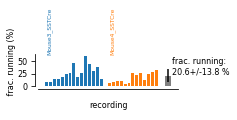

In [167]:
from physion.analysis.behavior import population_analysis
fig, ax = ge.figure(figsize=(1.5,.7), right=5, top=2.5)
_, ax = population_analysis(FILES, ax=ax)
ge.save_on_desktop(fig, 'fig.png')

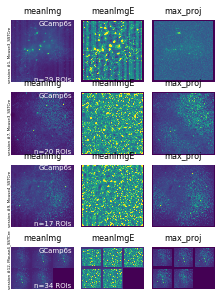

In [163]:
## window quality

sessions = [1,28,4,21]
fig, AX = ge.figure(axes=(3,len(sessions)), 
                    figsize=(1,1.5), left=0.1, right=0, top=.1, bottom=0, hspace=0.1, wspace=0.2)

for i, session in enumerate(sessions):
    data = MultimodalData(FILES[session-1])
    for key, ax, nl in zip(['meanImg', 'meanImgE', 'max_proj'], AX[i][:], [2,1,]):
        data.show_CaImaging_FOV(key=key, NL=nl, cmap=ge.viridis, #ge.get_linear_colormap('k', 'green'), 
                                ax=ax, roiIndex=None, with_roi_zoom=False)
    ge.annotate(AX[i][0], 'GCamp6s', (.98,.99), ha='right', va='top', color='w', size='xxx-small')
    ge.annotate(AX[i][0], 'n=%i ROIs ' % data.iscell.sum(), (1,.0), ha='right', color='w', size='x-small')
    ge.annotate(AX[i][0], 'session #%i, %s ' % (session, data.metadata['subject_ID']), (0,.0), 
                ha='right', rotation=90, size='x-small')
ge.save_on_desktop(fig, 'fig.png')

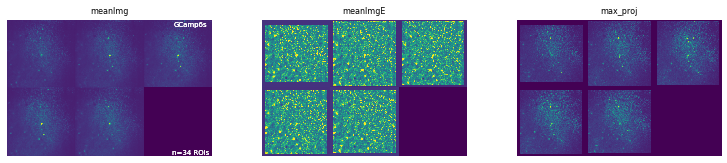

In [183]:
data = MultimodalData(FILES[-1])
fig, AX = ge.figure(axes=(3,1), 
                    figsize=(2,3), left=0.1, right=0, top=.5, bottom=0, hspace=0.1, wspace=0.05)
for key, ax, nl in zip(['meanImg', 'meanImgE', 'max_proj'], AX, [2,1,2]):
    data.show_CaImaging_FOV(key=key, NL=nl, cmap=ge.viridis, #ge.get_linear_colormap('k', 'green'), 
                                ax=ax, roiIndex=None, with_roi_zoom=False)
    ge.annotate(AX[0], 'GCamp6s', (.98,.99), ha='right', va='top', color='w', size='small')
    ge.annotate(AX[0], 'n=%i ROIs ' % data.iscell.sum(), (1,.0), ha='right', color='w', size='small')
ge.save_on_desktop(fig, 'fig.png')

In [ ]:
# Visual stimulation protocol

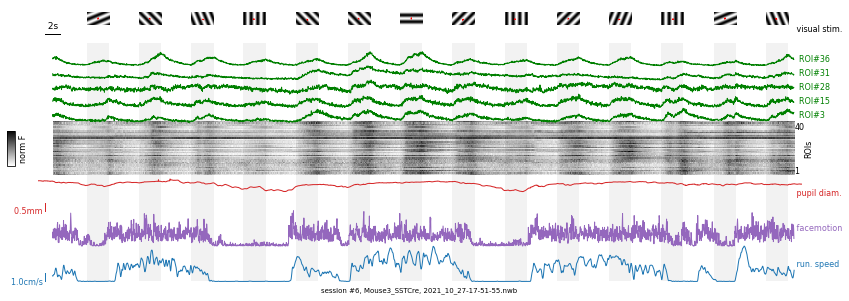

In [276]:
index =5
np.random.seed(10)
data = MultimodalData(FILES[index])
fig, ax = data.plot_raw_data(tlim=[310, 410], 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=1, color=ge.blue),
                            'FaceMotion':dict(fig_fraction=2, subsampling=1, color=ge.purple),
                            'Pupil':dict(fig_fraction=2, subsampling=1, color=ge.red),
                            'CaImagingRaster':dict(fig_fraction=3, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   quantity='CaImaging', subquantity='Fluorescence'),
                            'CaImaging':dict(fig_fraction=4, subsampling=1,
                                                   roiIndices=np.sort(np.random.choice(np.arange(data.iscell.sum()),5, 
                                                                               replace=False)),
                                                   quantity='CaImaging', subquantity='Fluorescence'),
                           'VisualStim':dict(fig_fraction=1)},
                   Tbar=2, figsize=(3.5,6));
ge.annotate(ax, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,0), ha='center', size='small')
ge.save_on_desktop(fig, 'fig.png', dpi=300)

# Spontaneous activity

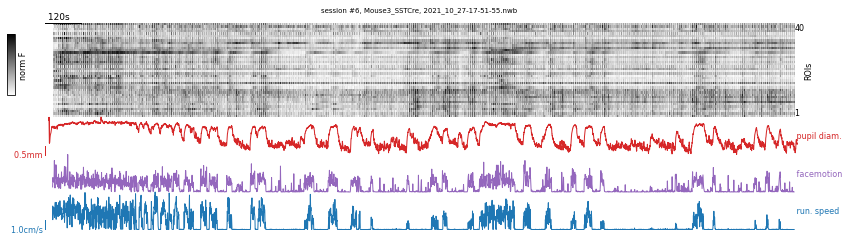

In [233]:
index = 5
data = MultimodalData(FILES[index])
#fig, ax = ge.figure(axes=(1,1), figsize=(2,2), left=0.2, bottom=0.04, top=0.1)
fig, ax = data.plot_raw_data(tlim=[10, 2510], 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=30, color=ge.blue),
                            'FaceMotion':dict(fig_fraction=2, subsampling=30, color=ge.purple),
                            'Pupil':dict(fig_fraction=2, subsampling=10, color=ge.red),
                            'CaImagingRaster':dict(fig_fraction=5, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   quantity='CaImaging', subquantity='Fluorescence')},
                   Tbar=120, figsize=(3.5,5));
ge.annotate(ax, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,1), ha='center', size='small')
ge.save_on_desktop(fig, 'fig.png', dpi=300)

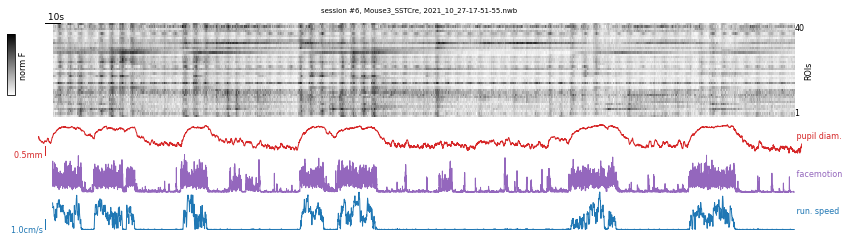

In [234]:
index =5
data = MultimodalData(FILES[index])
#fig, ax = ge.figure(axes=(1,1), figsize=(2,2), left=0.2, bottom=0.04, top=0.1)
fig, ax = data.plot_raw_data(tlim=[510, 1010], 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=1, color=ge.blue),
                            'FaceMotion':dict(fig_fraction=2, subsampling=1, color=ge.purple),
                            'Pupil':dict(fig_fraction=2, subsampling=1, color=ge.red),
                            'CaImagingRaster':dict(fig_fraction=5, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   quantity='CaImaging', subquantity='Fluorescence')},
                   Tbar=10, figsize=(3.5,5));
ge.annotate(ax, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,1), ha='center', size='small')
ge.save_on_desktop(fig, 'fig.png', dpi=300)

# Visually-evoked activity

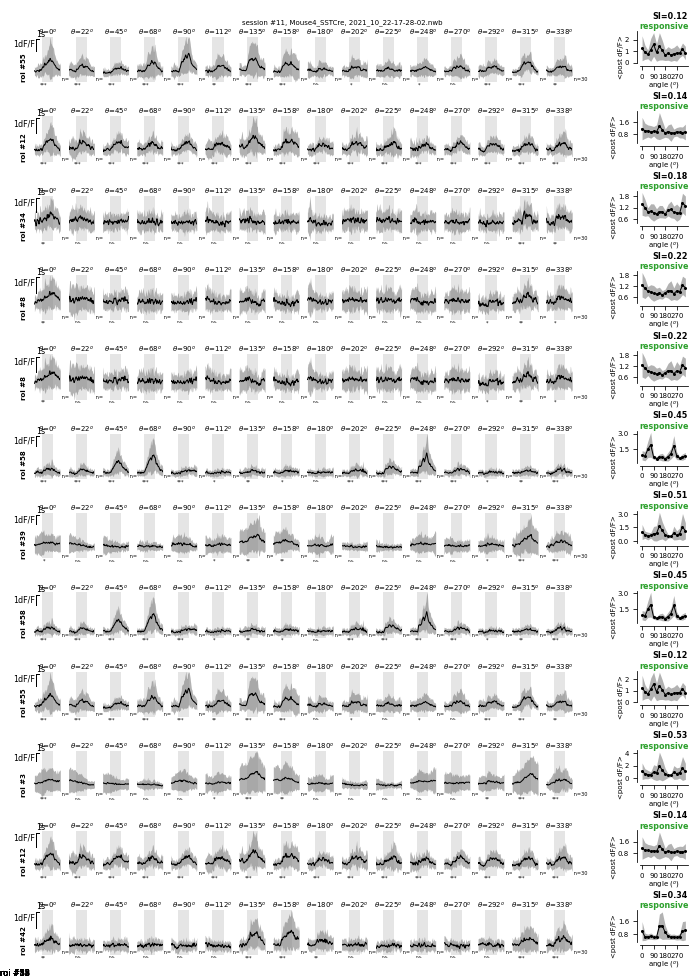

In [251]:
from physion.analysis.orientation_direction_selectivity import DS_ROI_analysis
from physion.analysis.process_NWB import EpisodeResponse
index = 10
data = MultimodalData(FILES[index])

Nexample = 12
fig, AX = ge.figure(axes=(16,Nexample), figsize=(.6,1), right=18, bottom=0.3, top=1.5,
                    reshape_axes=False, wspace=0.5, hspace=1.2)

for n, i in enumerate(np.random.choice(np.arange(data.iscell.sum()), Nexample)):
    DS_ROI_analysis(data, roiIndex=i, fig=fig, AX=[AX[n]],
                    inset_coords=(.92,1.-(n+.7)/Nexample,0.07,.4/Nexample),
                    CaImaging_options = dict(quantity='CaImaging', subquantity='d(F-0.7*Fneu)'),
                    verbose=False)
    ge.annotate(AX[n][0], 'roi #%i\n' % (i+1), (0,0), ha='right', rotation=90, size='small', bold=True)

ge.annotate(fig, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,1), ha='center', va='top', size='small', xycoords='figure fraction')

ge.save_on_desktop(fig, 'fig.png', dpi=300)

## modulation of visually-evoked responses by behavioral state

In [6]:
from physion.analysis.behavioral_modulation import tuning_modulation_fig, compute_behavior_mod_population_tuning, population_tuning_fig, compute_population_resp

options = dict(subquantity='d(F-0.7*Fneu)',
               dt_sampling=1, prestim_duration=3, 
               verbose=False)

 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  


In [33]:
FILES = ['/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_12/2021_10_12-15-34-26.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_12/2021_10_12-16-44-18.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_14/2021_10_14-15-34-45.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-13-12-35.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-16-42-16.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-17-51-55.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_27/2021_10_27-16-05-01.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_14/2021_10_14-16-54-21.nwb', # PB HERE
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-14-30-52.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_20/2021_10_20-16-22-39.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_22/2021_10_22-17-28-02.nwb',
         '/home/yann/DATA/CaImaging/SSTcre_GCamp6s/Batch2-Sept_2021/2021_10_22/2021_10_22-16-10-05.nwb']

In [35]:
from physion.analysis.behavioral_modulation import compute_DS_population_resp

options = dict(subquantity='d(F-0.7*Fneu)',
               dt_sampling=1, prestim_duration=2.5, 
               verbose=False)

FULL_RESPS = []
for i in range(len(FILES)):
    FULL_RESPS.append(compute_DS_population_resp(FILES[i], options, protocol_id=0))
    

 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  
 /!\ sliding percentile gets negative -> pb !  


/home/yann/miniconda3/lib/python3.9/site-packages/physion/analysis/behavioral_modulation.py:192: RuntimeWarning: Mean of empty slice.
  curves['constricted_mean'].append(full_resp[resp_key][cond & constricted_cond].mean())
/home/yann/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yann/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yann/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/yann/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


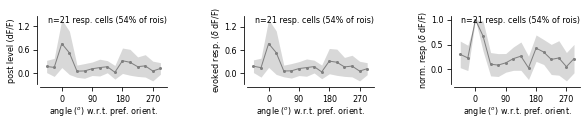

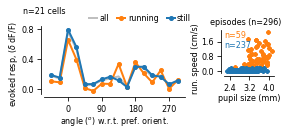

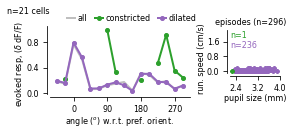

In [36]:
from physion.analysis.behavioral_modulation import tuning_modulation_fig, compute_behavior_mod_population_tuning, population_tuning_fig, compute_DS_population_resp

full_resp = FULL_RESPS[0]
fig = population_tuning_fig(full_resp)
curves = compute_behavior_mod_population_tuning(full_resp,
                                                running_speed_threshold = 0.2,
                                                pupil_threshold=2.3)
fig1, fig2 = tuning_modulation_fig(curves, full_resp=full_resp)


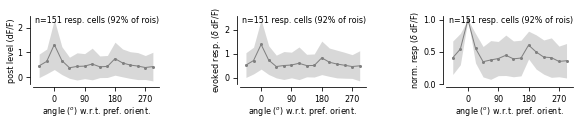

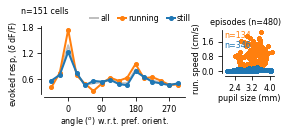

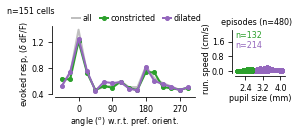

In [32]:
fig = population_tuning_fig(full_resp)
curves = compute_behavior_mod_population_tuning(full_resp,
                                                running_speed_threshold = 0.2,
                                                pupil_threshold=2.7)
fig1, fig2 = tuning_modulation_fig(curves, full_resp=full_resp)

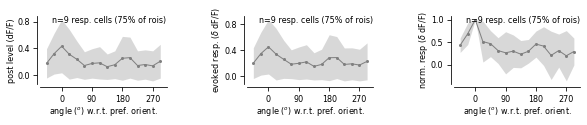

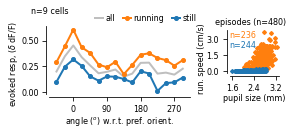

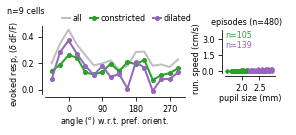

In [10]:
fig = population_tuning_fig(full_resp)
curves = compute_behavior_mod_population_tuning(full_resp,
                                                running_speed_threshold = 0.2,
                                                pupil_threshold=2.1)
fig1, fig2 = tuning_modulation_fig(curves, full_resp=full_resp)

In [26]:
FULL_RESPS = []
for i in range(len(FILES)):
    FULL_RESPS.append(compute_population_resp(FILES[i], options, protocol_id=0))

UnboundLocalError: local variable 'Pupil_episodes' referenced before assignment

/home/yann/miniconda3/lib/python3.9/site-packages/datavyz/draw_figure.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(mm2inch(dim['full_width']),


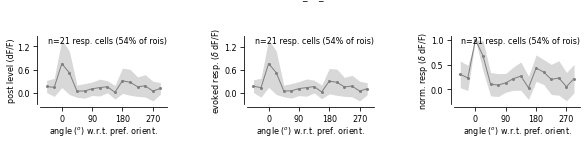

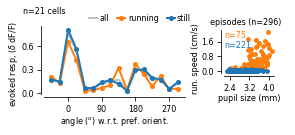

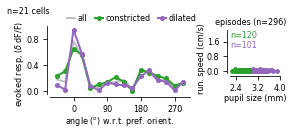

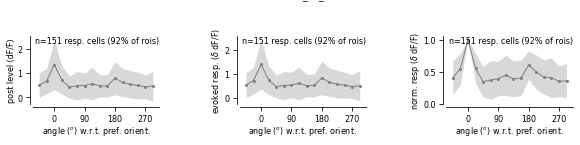

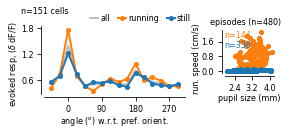

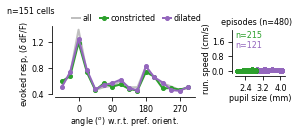

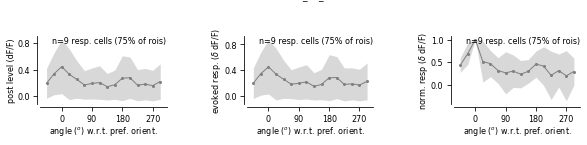

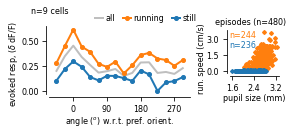

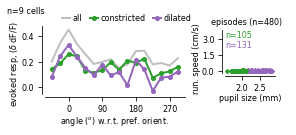

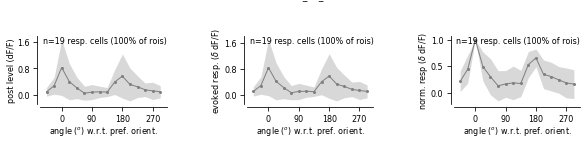

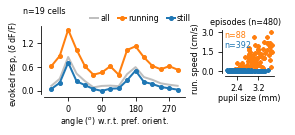

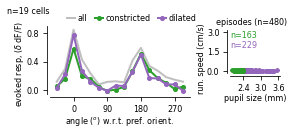

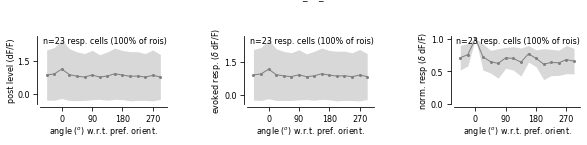

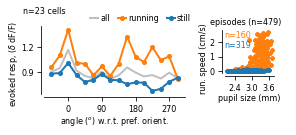

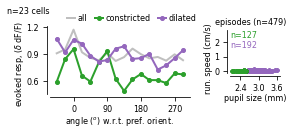

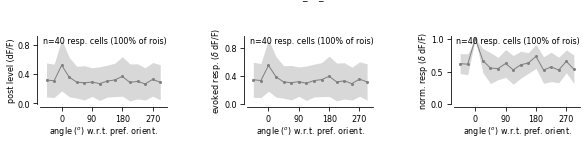

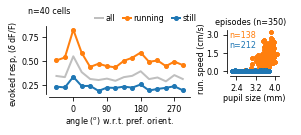

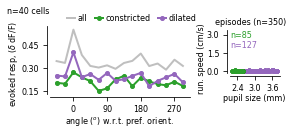

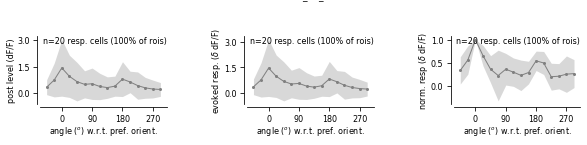

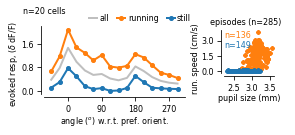

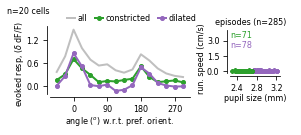

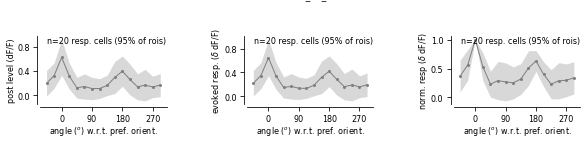

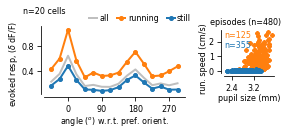

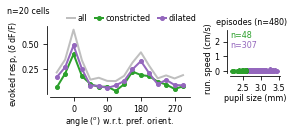

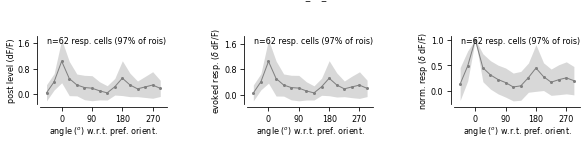

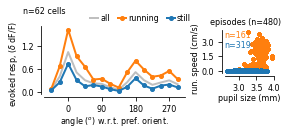

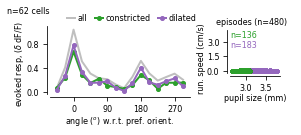

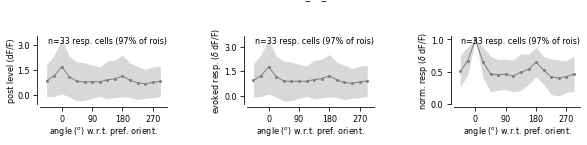

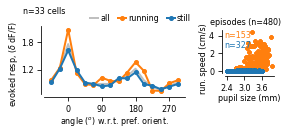

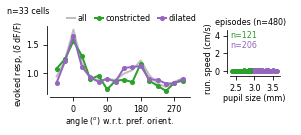

In [102]:
CURVES = []
thresholds = [2.9, 2.9, 2.1, 2.4, 2.6, 2.6, 2.7, None, None, 2.6, 3.1, 2.9, 2.5]

for i in range(len(FILES)):
    if thresholds[i] is not None:
        fig = population_tuning_fig(FULL_RESPS[i])
        ge.annotate(fig, 'session #%i: %s' % (i+1, FILES[i].split(os.path.sep)[-1]), (.5,1.),
                    xycoords='figure fraction', ha='center', va='top', size='xxx-small')
        curves = compute_behavior_mod_population_tuning(FULL_RESPS[i],
                                                        running_speed_threshold = 0.1,
                                                        pupil_threshold=thresholds[i])
        CURVES.append(curves)
        fig1, fig2 = tuning_modulation_fig(curves, full_resp=FULL_RESPS[i])
        ge.save_on_desktop(fig, 'figs/full-%i.png' % (i+1))
        ge.save_on_desktop(fig1, 'figs/running-%i.png' % (i+1))
        ge.save_on_desktop(fig2, 'figs/pupil-%i.png' % (i+1))
        for f in [fig, fig1, fig2]:
            plt.close(fig)
        

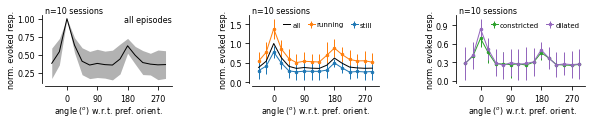

In [151]:
from datavyz import ge
# sessions average
SA = {}
for key in ['all', 'running', 'still', 'constricted', 'dilated']:
    SA[key] = np.zeros((len(CURVES), len(CURVES[0]['angles'])))

for i in range(len(CURVES)):
    norm = CURVES[i]['all'].max()
    SA['all'][i,:] = CURVES[i]['all']/norm
    for key in ['running', 'still', 'constricted', 'dilated']:
        SA[key][i,:] = CURVES[i]['%s_mean' % key]/norm
                  

# all episodes
fig, AX = ge.figure(axes=(3,1), figsize=(1.5,1.5))
ge.plot(CURVES[0]['angles'], SA['all'].mean(axis=0), sy=SA['all'].std(axis=0), no_set=True, ax=AX[0], lw=1)
ge.annotate(AX[0], 'all episodes', (1,1), va='top', ha='right')
ge.set_plot(AX[0], xlabel='angle ($^{o}$) w.r.t. pref. orient.', ylabel='norm. evoked resp.',
               xticks=[0,90,180,270], num_yticks=4)

# running vs still
ge.plot(CURVES[0]['angles'], SA['all'].mean(axis=0), no_set=True, ax=AX[1], lw=1, label='all')
ge.scatter(CURVES[0]['angles'], SA['running'].mean(axis=0), sy=SA['running'].std(axis=0),
        no_set=True, ax=AX[1], lw=1, color=ge.orange, label='running')
ge.scatter(CURVES[0]['angles'], SA['still'].mean(axis=0), sy=SA['still'].std(axis=0),
        no_set=True, ax=AX[1], lw=1, color=ge.blue, label='still')
ge.set_plot(AX[1], xlabel='angle ($^{o}$) w.r.t. pref. orient.', ylabel='norm. evoked resp.',
               xticks=[0,90,180,270], num_yticks=4)
ge.legend(AX[1], ncol=3, size='small')

# constricted vs dilated 
#ge.plot(CURVES[0]['angles'], SA['all'].mean(axis=0), no_set=True, ax=AX[2], lw=0.5, label='all')
ge.scatter(CURVES[0]['angles'], SA['constricted'].mean(axis=0), sy=SA['constricted'].std(axis=0),
        no_set=True, ax=AX[2], lw=1, color=ge.green, label='constricted')
ge.scatter(CURVES[0]['angles'], SA['dilated'].mean(axis=0), sy=SA['dilated'].std(axis=0),
        no_set=True, ax=AX[2], lw=1, color=ge.purple, label='dilated')
ge.set_plot(AX[2], xlabel='angle ($^{o}$) w.r.t. pref. orient.', ylabel='norm. evoked resp.',
               xticks=[0,90,180,270], num_yticks=4)
ge.legend(AX[2], ncol=2, size='small', loc='upper right')


for ax in AX:
    ge.annotate(ax, 'n=%i sessions' % len(CURVES), (0,1))
    
ge.save_on_desktop(fig, 'figs/final.png', dpi=300)